# Trabalho 2 de Mineração de Dados <br> O Perceptron!
# Alunos: 
* Natanael Moreira Lemos - Matrícula: 398447 
* Ramiro Campos de Castro - Matrícula: 400723

## Implementação de um Classificador Perceptron

In [57]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [59]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## <font color='black'>Questao 1 - Implemente uma função para calcular a acurácia do modelo</font>


## Para o cálculo da acurácia, foi calculado feito a divisão da quantidade de acertos pela quantidade de predições. Opcionalmente, também pode ser retornado a Matriz de Confusão.

In [60]:
def accuracy(x, y, confusion = False):
    pred = np.array(x)
    real = np.array(y)
    if(pred.size != real.size):
        print('different sizes')
        return   
    rClasses = {i:j for i,j in zip(np.unique(real),range(np.unique(real).size))} # realClasses
    
    pClasses = {i:j for i,j in zip(np.unique(pred),range(np.unique(pred).size))} # predictedClasses
    if(confusion):
        ConfMatrix = np.zeros([np.unique(real).size,np.unique(real).size], int)
        for i,j in zip(real,pred):
            ConfMatrix[rClasses[i],pClasses[j]] += 1
#         tp = #TruePositives, como faz para mais de duas classes?
#         tn = #TrueNegatives
#         fp = #FalsePositives
#         fn = #FalseNegaives
        acc = round(float(ConfMatrix.diagonal().sum()/ConfMatrix.sum()),2) #Valores preditos corretamente sobre todos os valores
        return acc, ConfMatrix 
    else:
        acc = 0
        for i,j in zip(real,pred):
            acc += 1 if(i==j) else 0
        return round(float(acc/real.size),2)
    
    

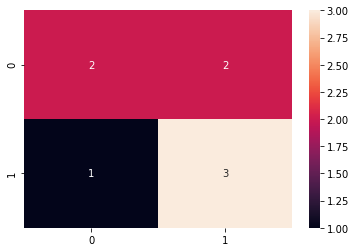

In [61]:
pred = np.array([1,1,1,0,0,1,0,1]) # valores preditos 
real = np.array([1,1,1,0,0,0,1,0]) # valores reais
acc, ConfMatrix = accuracy(pred, real, confusion = True)
sn.heatmap(ConfMatrix,annot=True)
plt.show()

* Matriz de Confusão utilizando CrossTab, para indicar quais os valores Reais e quais os Preditos

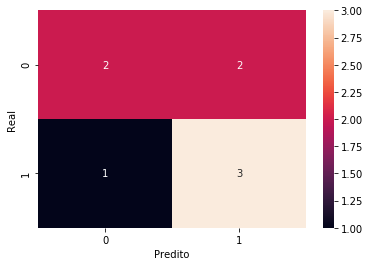

In [62]:
CrossTab = pd.crosstab(real, pred, dropna=False, rownames=['Real'], colnames=['Predito'], margins = False)
sn.heatmap(CrossTab,annot=True)
plt.show()

## <font color='black'>Questao 2 - Implemente um método de validação cruzada para testar </font>

### <font color='green'>Vamos utilizar o método K-Fold Cross Validation, com um K padrão de 4, porém podendo ser variado. <br>   A acurária é calculada K vezes e é retornada a média das acurácias.</font>

In [63]:
def crossVal(perceptron, x, y, k = 4):
    if(y.shape[0]!= x.shape[0]):
        print('Tamanhos diferentes')
        return
    size = y.shape[0]
    acc = np.zeros(k)
    conf = np.zeros(k)
    for i in range(k):
        iTeste = round((i)*size/k)
        fTeste = round((i+1)*size/k)

        xTeste = x[iTeste:fTeste,:] 
        yTeste = y[iTeste:fTeste] 

        xTreino = np.concatenate((x[0:iTeste,:], x[fTeste:,:]), axis=0)
        yTreino = np.concatenate((y[0:iTeste], y[fTeste:]), axis=0)

        perceptron.fit(xTreino, yTreino)
        predict = perceptron.predict(xTeste)

        
        acc[i] = accuracy(predict,yTeste)

    return acc.mean()

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

### <span style="color:#ff3333">Importante notar que a acurária vai depender do número de dados da amostra e da sua distribuição no espaço*</span>

# <span style="color:#29a329">2.1   Data set sintético com classes  *linearmente separáveis*</span>
## x[n] = [a,b]
## y = 1 se a+b>=2*b, se não y = -1

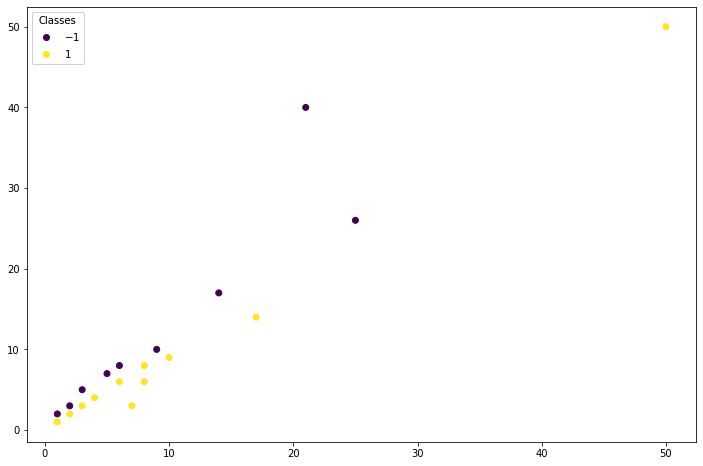

In [64]:
X = np.array([[1,1],[2,2],[2,3],[3,3],[4,4],[5,7],[6,6],[7,3],[8,8],[8,6],[1,2],[3,5],[9,10],[6,8],[10,9],[25,26],[50,50]
             ,[17,14],[14,17],[21,40]])

# esse X comentado gera todas as predições do X_newdata corretos
y = np.zeros(X.shape[0],int)
for i in range(y.size):
    y[i] = 1 if(X[i][0]+X[i][1]>=2*X[i][1]) else -1
fig, ax = plt.subplots(figsize=(12,8))    
# fig.figure(figsize=(14,10))
scatter = ax.scatter(x = X[:,0], y = X[:,1], c = y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
plt.show()

### <span style="color:#29a329">Testando o perceptron com 20 amostras, e usando K-Fold Cross Validation, com K = 4</span>

In [65]:

acc = crossVal(ppn, X, y, k = 4)
print('Obteve-se uma Acurárica de %0.02f'%acc)

Obteve-se uma Acurárica de 0.75



# <span style="color:#29a329">2.2   Data set sintético com classes <font color='red'>não</font> *lineramente separáveis*</span>
## x[n] = [a,b]
## y = 1 se a+b>=$a^2$, se não y = -1

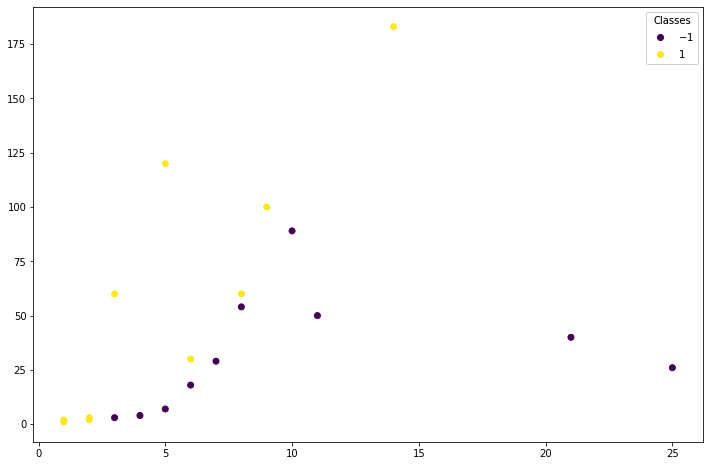

In [66]:
X = np.array([[1,1],[2,2],[2,3],[3,3],[4,4],[5,7],[6,30],[7,29],[8,60],[8,54],[1,2],[3,60],[9,100],[6,18],[10,89],[25,26],
              [11,50],[5,120],[14,183],[21,40]])

# esse X comentado gera todas as predições do X_newdata corretos
y = np.zeros(X.shape[0],int)
for i in range(y.size):
    a = X[i][0]
    b = X[i][1]
    y[i] = 1 if(a+b>=a**2) else -1
    
fig, ax = plt.subplots(figsize=(12,8))    
# fig.figure(figsize=(14,10))
scatter = ax.scatter(x = X[:,0], y = X[:,1], c = y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

### <span style="color:#29a329">Testando o perceptron com 20 amostras, e usando K-Fold Cross Validation, com K = 4</span>

In [67]:
    
acc = crossVal(ppn, X, y, k = 4)
print('Obeteve-se uma Acurárica de %0.02f'%acc)

Obeteve-se uma Acurárica de 0.55


# Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso

## O Glaucoma é um sério problema de saúde que caso não tratado, pode levar a cegueira.
## Um dos exames usado para detectar a presença de Glaucoma é a *fundoscopia* , que examina o fundo de olho.
## Para identificar a presença de Glaucoma a partir do exame da fundoscopia, algumas medidas são utilizadas. Neste estudo de caso iremos utilizar 2 dessas medidas, que serão explicadas a seguir.
### Obs: as imagens foram retiradas de um artigo, porém as medidas calculadas foram obtidas por algorítmo próprio, utilizando imagens de 2 datasets diferentes <br/> 1ºdataset: https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php <br/>2ºdataset: https://www.kaggle.com/himanshuagarwal1998/glaucomadataset

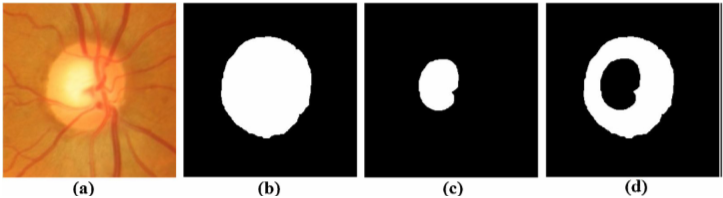

# Na imagem acima, temos as segmentações obtidas a partir da fundoscopia.
# Em (a) temos a região de interesse, que contém o nervo óptico;<br/> Em (b) temos a área do Disco Óptico(Disk);<br/> Em (c) temos a área da Escavação(Cup);
## A partir de (c) e (b), obtemos a proporção da Escavação para o Disco(CDR - Cup to Disc Ratio), está é uma das medidas que será utilizada.
# Já em (d) temos o Anel Neurorretiniano(NRR - Neroretinal Rim), que é a obtido por (b) - (c).

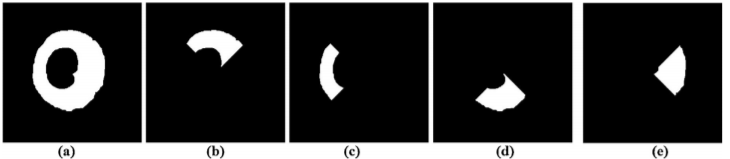

# Nesta imagem, temos em (a) o NRR, mostrado na imagem anterior, suas 4 regiões: <br/> (b): Superior <br/> (c): Temporal <br/> (d): Inferior <br/> (e): Nasal
## A 2º medida que utilizamos é obtida por: (b) + (d) / (c) + (e)

# A partir destas 2 medidas, tentaremos ver se o Perceptron é um classificador eficiente para detectar o Glaucoma. Utilizaremos o Perceptron e a Cross Validation criados neste notebook e também o compararemos com sua versão do SciKit Learn

##  <font color='green'>3.1. Utilizando o 1º dataset, onde foram utilizadas 50 imagens</font>

In [68]:
data1 = pd.read_csv('Glaucoma.csv', index_col=0)
data1.head()


,Image,CDR,NRR,Glaucoma
0,drishtiGS_002,0.3032,0.6597,1
1,drishtiGS_004,0.2785,1.0305,1
2,drishtiGS_008,0.4323,0.9216,-1
3,drishtiGS_010,0.5524,1.1925,1
4,drishtiGS_012,0.5466,0.7486,1


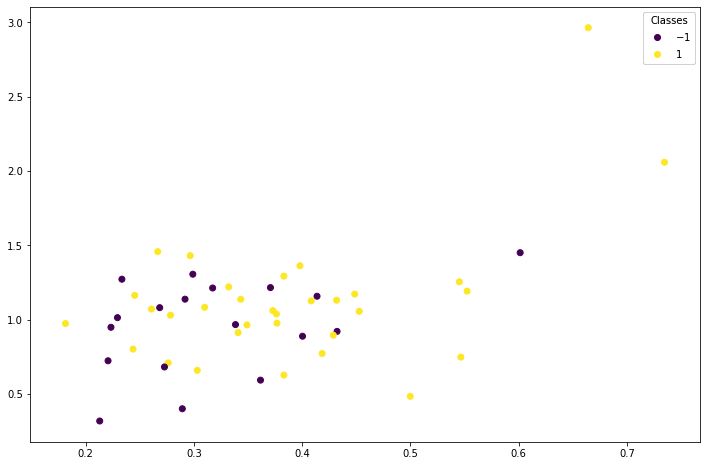

In [69]:
fig, ax = plt.subplots(figsize=(12,8))    
scatter = ax.scatter('CDR','NRR',data=data1,c='Glaucoma')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

###  <font color='green'>3.1.a) Testando o 1º dataset com o modelo criado neste notebook</font>

In [70]:
x = data1.iloc[:,1:3].values
y = data1.iloc[:,3].values
acc = crossVal(ppn, x, y, k = 4)
print('Obteve-se uma Acurárica de %0.02f'%acc)

Obteve-se uma Acurárica de 0.36


###  <font color='green'>3.1.b) Testando o 1º dataset com o modelo do SciKit Learn</font>

In [71]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

In [72]:

eta = 0.1
x = data1.iloc[:,1:3].values
y = data1.iloc[:,3].values
SkLearnPerceptron = Perceptron(random_state=0, eta0 = eta, max_iter = 100)
scores = cross_val_score(SkLearnPerceptron, x, y, cv=4)
print('Obteve-se uma Acurárica de %0.02f'%scores.mean())

Obteve-se uma Acurárica de 0.42


##  <font color='green'>3.2. Utilizando o 2º dataset foram utilizadas 200 imagens do Kaggle</font>

In [73]:
data2 = pd.read_csv('GlaucomaKaggle.csv', index_col=0)
data2.head()

,Image,CDR,NRR,Glaucoma
0,image100prime.tif,0.1269,0.4336,1
1,image101prime.tif,0.2644,0.3000,1
2,image102prime.tif,0.1602,0.3136,1
3,image103prime.tif,0.1723,0.0094,1
4,image104prime.tif,0.2492,0.5567,1


<function matplotlib.pyplot.show(*args, **kw)>

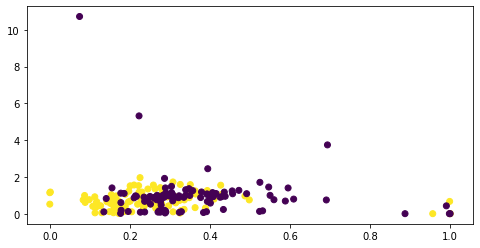

In [74]:
plt.figure(figsize=(8,4))
plt.scatter('CDR','NRR',data=data2,c='Glaucoma')
plt.show

###  <font color='green'>3.2.a) Testando o 1º dataset com o modelo criado neste notebook</font>

In [75]:
x = data2.iloc[:,1:3].values
y = data2.iloc[:,3].values
acc = crossVal(ppn, x, y, k = 4)
print('Obteve-se uma Acurárica de %0.02f'%acc)

Obteve-se uma Acurárica de 0.50


###  <font color='green'>3.2.b) Testando o 1º dataset com o modelo do SciKit Learn</font>

In [76]:
eta = 0.1
x = data2.iloc[:,1:3].values
y = data2.iloc[:,3].values
SkLearnPerceptron = Perceptron(random_state=0, eta0 = eta, max_iter = 100)
scores = cross_val_score(SkLearnPerceptron, x, y, cv=4)
print('Obteve-se uma Acurárica de %0.02f'%scores.mean())

Obteve-se uma Acurárica de 0.50
